## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from __future__ import absolute_import, division, print_function
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [58]:
print('--- THE DATA ---')
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
60000 train samples
10000 test samples


In [4]:
""

''

In [0]:
#import numpy as np
#import PIL.Image as pil
#from tensorflow.examples.tutorials.mnist import input_data

#mnist = input_data.read_data_sets('mnist')

#testImage = (np.array(mnist.test.images[0], dtype='float')).reshape(28,28)

#img = pil.fromarray(np.uint8(testImage * 255) , 'L')
#img.show()

### Find dimensions of an image in the dataset

In [59]:
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28)


In [60]:
x_train.shape[1:]

(28, 28)

In [61]:
x_test.shape[1:]

(28, 28)

In [63]:
y_train.shape

(60000,)

In [64]:
y_test.shape

(10000,)

In [0]:
import pandas as pd
import numpy as np

In [66]:
pd.Series(y_train).value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [67]:
import numpy as np
import pandas as pd

pd.Series(y_test).value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
dtype: int64

In [68]:
pd.Series(y_train).value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [0]:
y_train = np_utils.to_categorical(y_train, num_classes= 10)

In [0]:
y_test = np_utils.to_categorical(y_test, num_classes= 10)

In [71]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


### Normalize both the train and test image data from 0-255 to 0-1

In [39]:
x_train.dtype

dtype('uint8')

In [72]:
y_train.dtype

dtype('float32')

In [0]:
x_train = x_train.astype("float32")

In [0]:
x_test = x_test.astype("float32")

In [0]:
x_train = x_train/255

In [0]:
x_test = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [0]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [79]:
y_train.shape

(60000, 10)

### Import the necessary layers from keras to build the model

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [81]:
 # Define model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.3801 - acc: 0.8639 - val_loss: 0.3048 - val_acc: 0.8861
Epoch 2/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.2358 - acc: 0.9133 - val_loss: 0.2835 - val_acc: 0.9018
Epoch 3/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.1711 - acc: 0.9366 - val_loss: 0.2375 - val_acc: 0.9152
Epoch 4/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.1203 - acc: 0.9557 - val_loss: 0.2603 - val_acc: 0.9196
Epoch 5/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0816 - acc: 0.9694 - val_loss: 0.3001 - val_acc: 0.9126
Epoch 6/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0542 - acc: 0.9799 - val_loss: 0.3476 - val_acc: 0.9133
Epoch 7/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0371 - acc: 0.9865 - val_loss: 0.

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [82]:
loss_and_metrics = model2.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 55us/step
[0.5010260092645884, 0.9093]


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
BATCH_SIZE = 32
EPOCHS = 10

In [84]:
    # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model3.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.3927 - acc: 0.8595 - val_loss: 0.3091 - val_acc: 0.8879
Epoch 2/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.2575 - acc: 0.9067 - val_loss: 0.2512 - val_acc: 0.9074
Epoch 3/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.2096 - acc: 0.9227 - val_loss: 0.2425 - val_acc: 0.9109
Epoch 4/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.1745 - acc: 0.9344 - val_loss: 0.2394 - val_acc: 0.9169
Epoch 5/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.1495 - acc: 0.9438 - val_loss: 0.2419 - val_acc: 0.9186
Epoch 6/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.1274 - acc: 0.9519 - val_loss: 0.2471 - val_acc: 0.9198
Epoch 7/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.1079 - acc: 0.9588 - val_loss: 0.2661 - 

In [85]:
loss_and_metrics = model3.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 53us/step
[0.29664954787045716, 0.924]


In [86]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
__________

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

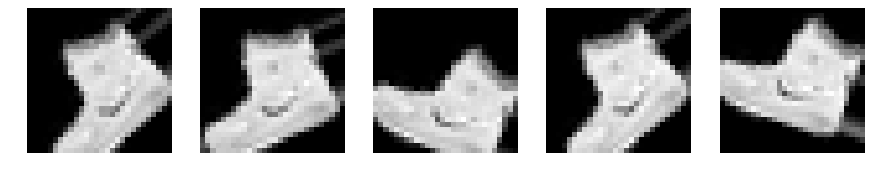

In [88]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [91]:
model3.fit_generator(datagen.flow(x_train,y_train,batch_size = 32),steps_per_epoch=len(x_train)/32,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.7263 - acc: 0.7336
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5362 - acc: 0.8008
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4860 - acc: 0.8204
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4534 - acc: 0.8302
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4327 - acc: 0.8399
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4089 - acc: 0.8484
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4009 - acc: 0.8517
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3916 - acc: 0.8552
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3805 - acc: 0.8593
Epoch 10/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3729 - acc: 0.8623


###  Report the final train and validation accuracy

In [92]:
loss_and_metrics = model3.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 52us/step
[0.2976569587945938, 0.8962]


In [93]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
__________

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### **Load CIFAR10 dataset**

In [95]:
%matplotlib inline
# Load/Prep the Data
(x_train, y_train_num), (x_test, y_test_num) = cifar10.load_data()

170500096/170498071 [==============================] - 18s 0us/step


In [0]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')

In [0]:
x_train /= 255
x_test /= 255

In [0]:
y_train = np_utils.to_categorical(y_train_num, 10)
y_test = np_utils.to_categorical(y_test_num, 10)

In [101]:
print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

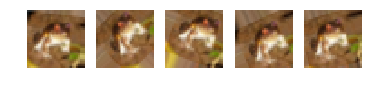

In [105]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()